<a href="https://colab.research.google.com/github/HunterTzou/DATA_110_FALL_2025/blob/main/Tzou_Hunter_Sleep_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('https://raw.githubusercontent.com/Zhouhun/DATA_110_FALL_2025/refs/heads/main/Sleep_health_and_lifestyle_dataset.csv')

## AI Acknowledgement: I had Chat GPT give me a color pallete

sleep_palette = [
    '#4C72B0',  # Deep royal blue (bold)
    '#6A5ACD',  # Vibrant violet-blue (bold)
    '#C5B4E3',  # Soft lavender
    '#A8C5E2',  # Pastel sky blue
    '#9D81BA',  # Muted purple highlight
    '#DCE3F2'   # Pale gray-blue (neutral)
]

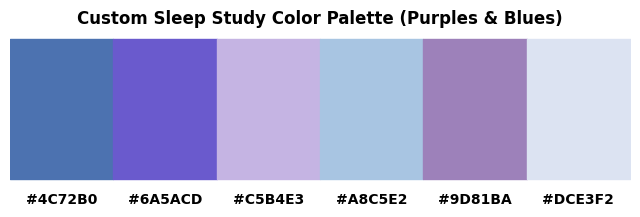

## Introduction

Sleep is one of the most important components of our lives and one which is often neglected. I believe that we could all practice better sleep hygiene and by studying this dataset, I am hoping that we might be able to improve our sleep.<br><br> The [ODPHP's website](https://odphp.health.gov/myhealthfinder/healthy-living/mental-health-and-relationships/get-enough-sleep#:~:text=Get%20sick%20less%20often,sleep%20tips%20to%20help%20you:) says that we could see the following benefits from getting more sleep:
- Get sick less often
- Stay at a healthy weight
- Lower your risk for serious health problems, like diabetes and heart disease
- Reduce stress, improve your mood, and get along better with people
- Think more clearly, form long-term memories, and do better in school and at work
- Make good decisions and avoid injuries — for example, drowsy drivers cause thousands of car accidents every year<br><br>

Due to experiencing some of the negative side effects of chronic sleep deprevation, I wanted to study the different lifestyle components which could affect our sleep.

## Data Set Introduction

This data set was picked from [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data). I picked this dataset because I am interested in sleep studies and how different health and lifestlye vairables can affect sleep quality. I also saw that this data set had enough depth for me to use for this project.

### Data Dictionary & Definitions

| **Column Name** | **Description** |
|------------------|-----------------|
| `Person ID` | Unique identifier for each individual. |
| `Gender` | Gender of the person (`Male` or `Female`). |
| `Age` | Age of the person in years. |
| `Occupation` | Occupation or profession of the person. |
| `Sleep Duration (hours)` | Number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | Subjective rating of sleep quality, ranging from 1 (poor) to 10 (excellent). |
| `Physical Activity Level (minutes/day)` | Number of minutes the person engages in physical activity daily. |
| `Stress Level (scale: 1-10)` | Subjective rating of stress level, ranging from 1 (low) to 10 (high). |
| `BMI Category` | Body Mass Index category (`Underweight`, `Normal`, `Overweight`). |
| `Blood Pressure (systolic/diastolic)` | Blood pressure measurement in systolic/diastolic format (e.g., 120/80). |
| `Heart Rate (bpm)` | Resting heart rate of the person, measured in beats per minute. |
| `Daily Steps` | Number of steps the person takes per day. |
| `Sleep Disorder` [^1] | Indicates whether the person has a sleep disorder (`None`, `Insomnia`, `Sleep Apnea`).|
<br><br>

[^1]: *Details about `Sleep Disorder` Column*:
- `None`: The individual does not exhibit any specific sleep disorder.
- `Insomnia`: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- `Sleep Apnea`: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks. <br><br>

According to the [ODPHP's website](https://odphp.health.gov/myhealthfinder/healthy-living/mental-health-and-relationships/get-enough-sleep#:~:text=Get%20sick%20less%20often,sleep%20tips%20to%20help%20you:), Adults need a minumum of 7 hours of good quality sleep. We will define good quality of sleep as above 5. anything below this standard is defined as inadequete sleep.

### Possible Data Set Short-Comings

Based on the [ODPHP's website](https://odphp.health.gov/myhealthfinder/healthy-living/mental-health-and-relationships/get-enough-sleep#:~:text=Get%20sick%20less%20often,sleep%20tips%20to%20help%20you:), Sleep schedule is an important factor in both the quality of sleep and the benefits we receive. This is missing from this dataset, so I think that would be something to add to make it more robust.

## Exploratory Data Analysis

### Check General Structure

In [2]:
df.shape

(374, 13)

In [3]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


All of the data types look correct to me, but it looks like there are 155 null values in `Sleep Disorder`. After looking at the csv. file, it looks like python is reading "None" as null values. I am going to try to replace them here with 'None' so I have values there. [^2]

[^2]: I learned this from ChatGPT since I did not know how to replace null values in a systematic way

In [5]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

## Check to make sure that it was actually filled

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


I want to be able to check to make sure that the Person ID column is unique otherwise I think that will cause issues down the road.

In [6]:
df['Person ID'].is_unique

True

Next I wanted to check the `object` columns (`Gender`, `Occupation`, `BMI Category`, and `Sleep Disorder`) to make sure that they have normalized values. I left out blood pressue on purpose because I am planning on altering that later on. I am also adding an age category to help with analysis down the line.

In [7]:
#Check the values which are returned by Gender

print(df['Gender'].unique())

['Male' 'Female']


In [8]:
#Check the unique values which are returned by Occupation

print(df['Occupation'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [9]:
#Check the unique values which are returned by BMI Category

print(df['BMI Category'].unique())

['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [10]:
#Check the unique values which are returned by Sleep Disorder

print(df['Sleep Disorder'].unique())

['None' 'Sleep Apnea' 'Insomnia']


It looks like there are some entries in `Occupation` that we could condense here (ex. 'Software Engineer' --> 'Engineer'). Additionally, `BMI Category` needs to have 'Normal Weight' converted to 'Normal'. I think that this will help us to make more educated decisions later.

In [11]:
## 'Normal Weight' ---> 'Normal'

df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

print(df['BMI Category'].unique())

['Overweight' 'Normal' 'Obese']


In [12]:

## Occupation Conversions
df['Occupation'] = df['Occupation'].replace({'Software Engineer': 'Engineer'})
df['Occupation'] = df['Occupation'].replace({'Sales Representative': 'Salesperson'})

print(df['Occupation'].unique())

['Engineer' 'Doctor' 'Salesperson' 'Teacher' 'Nurse' 'Accountant'
 'Scientist' 'Lawyer' 'Manager']


In [13]:
## Creating age category

def age_category(row):
    age = row['Age']
    if age < 35:
        return '25–34'
    elif 35 <= age <= 44:
        return '35–44'
    elif 45 <= age <= 54:
        return '45–54'
    elif age >= 55:
        return '55–64'
    else:
        return 'Unknown'

## I did not know how to apply the logic to the df and add the column, so I asked Chat GPT

df['Age Category'] = df.apply(age_category, axis=1)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Category
0,1,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,25–34
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,25–34
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,25–34
3,4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,25–34
4,5,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,25–34


Next I would like to see if there are duplicates in the data. Since the ID column is unique, that should mean that there are no duplicates, but it is good to check.

In [14]:
df.duplicated().sum()

np.int64(0)

### Explore Data



In [15]:
df.describe().round(2)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00


It looks like our mean age is 42, which is important to note because our findings might be different with different demographics. <br><br>

It seems like the duration and quality of sleep are above the minimum standards. <br><br>

The physical activity level is above average for what I was expecting. <br><br>

---

#### **Stress Analysis**

I wanted to look into factors which indicate stress levels and I came up with the following list:
- Occupation
- Stress Level
- Heart Rate
- Blood Pressure

I wanted to put them all into a table to help me better understand how the data was distributed and what the averages were along occupational lines. I think that it is a good indicator of how we can group them since a lot of stress can come from work.<br><br>
First, I wanted to split the `Blood Pressure` column into two seperate columns and then categorize them based on their results. Right now, the blood pressure column is classed as a string/object, so I cannot use that since the blood pressure is made up of two different components `Systolic` Pressure and `Diastolic` Pressure.<br><br>
I based my categories off of the [AHA website](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings) and specifically this chart:

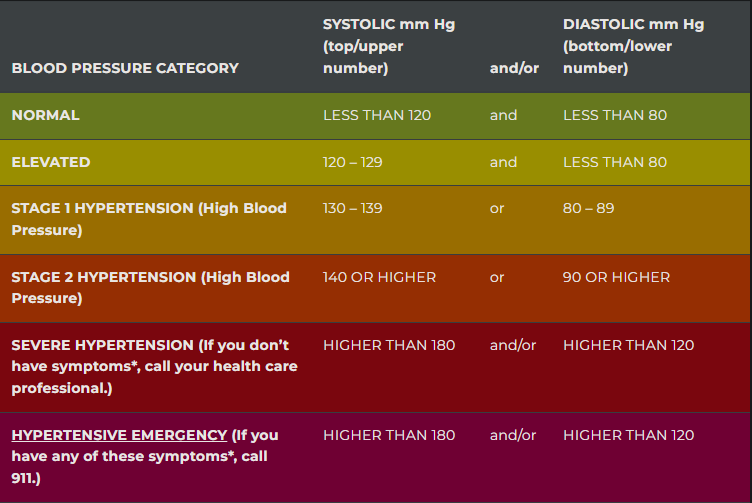

In [16]:
# I did not know how to split a string into two columns, so I asked Chat GPT to show me how.

# Split into two columns

df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Categorize the Blood Pressure Reading

def bp_category(row):
    sys, dia = row['Systolic'], row['Diastolic']
    if sys < 120 and dia < 80:
        return 'Normal'
    elif 120 <= sys <= 129 and dia < 80:
        return 'Elevated'
    elif (130 <= sys <= 139) or (80 <= dia <= 89):
        return 'Stage 1 Hypertension'
    elif sys >= 140 or dia >= 90:
        return 'Stage 2 Hypertension'
    elif sys > 180 or dia > 120:
        return 'Hypertensive Emergency'
    else:
        return 'Unknown'

## I did not know how to apply the logic to the df and add the column, so I asked Chat GPT

df['BP Category'] = df.apply(bp_category, axis=1)

df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Category,Systolic,Diastolic,BP Category
0,1,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,25–34,126,83,Stage 1 Hypertension
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,25–34,125,80,Stage 1 Hypertension
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,25–34,125,80,Stage 1 Hypertension
3,4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,25–34,140,90,Stage 2 Hypertension
4,5,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,25–34,140,90,Stage 2 Hypertension
5,6,Male,28,Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,25–34,140,90,Stage 2 Hypertension
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,25–34,140,90,Stage 2 Hypertension
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,25–34,120,80,Stage 1 Hypertension
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,25–34,120,80,Stage 1 Hypertension
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,25–34,120,80,Stage 1 Hypertension


In [17]:
# Next I am creating the table to show me how the occupations stack up against one another

stress_summary = df.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep','Stress Level','Heart Rate', 'Systolic', 'Diastolic']].mean().round(2)

stress_summary['#'] = df['Occupation'].value_counts()
stress_summary['% of Total'] = df['Occupation'].value_counts(normalize=True) * 100

stress_summary = stress_summary.rename(columns={
    'Stress Level': 'Avg Stress Level',
    'Heart Rate': 'Avg Heart Rate',
    'Sleep Duration': 'Avg. Sleep Duration',
    'Quality of Sleep': 'Avg. Sleep Quality'
})

stress_summary['Avg. BP Category'] = stress_summary.apply(bp_category, axis=1)

stress_summary = stress_summary[['#', '% of Total', 'Avg. Sleep Duration', 'Avg. Sleep Quality','Avg Stress Level', 'Avg Heart Rate', 'Systolic', 'Diastolic', 'Avg. BP Category']].round(2)

stress_summary.head(11)

,#,% of Total,Avg. Sleep Duration,Avg. Sleep Quality,Avg Stress Level,Avg Heart Rate,Systolic,Diastolic,Avg. BP Category
Occupation,,,,,,,,,
Accountant,37,9.89,7.11,7.89,4.59,68.86,117.73,76.92,Normal
Doctor,71,18.98,6.97,6.65,6.73,71.52,123.00,80.51,Stage 1 Hypertension
Engineer,67,17.91,7.91,8.30,4.01,67.69,125.94,81.49,Stage 1 Hypertension
Lawyer,47,12.57,7.41,7.89,5.06,69.64,129.96,85.00,Stage 1 Hypertension
Manager,1,0.27,6.90,7.00,5.00,75.00,125.00,82.00,Stage 1 Hypertension
Nurse,73,19.52,7.06,7.37,5.55,72.00,138.52,93.73,Stage 1 Hypertension
Salesperson,34,9.09,6.37,5.88,7.06,72.76,130.59,85.29,Stage 1 Hypertension
Scientist,4,1.07,6.00,5.00,7.00,78.50,129.50,85.50,Stage 1 Hypertension
Teacher,40,10.70,6.69,6.98,4.53,67.22,131.22,86.90,Stage 1 Hypertension


It looks like a large proportion of the participants are in the healthcare field (~ 38%). I also find it interesting that most of the participants have an above average blood pressure, being in Stage 1 Hypertension.I also noticed that there are only 4 scientists and 1 Manager. So, there results may not be representative of the whole population. <br><br>

I think that will definitely skew the results some, so that is something I will take note of. I am now curious to see the distribution of gender and age as well.

In [18]:
gender_summary = df.groupby('Gender')[['Sleep Duration', 'Quality of Sleep','Stress Level','Heart Rate', 'Systolic', 'Diastolic']].mean().round(2)

gender_summary['#'] = df['Gender'].value_counts()
gender_summary['% of Total'] = df['Gender'].value_counts(normalize=True) * 100

gender_summary = gender_summary.rename(columns={
    'Stress Level': 'Avg Stress Level',
    'Heart Rate': 'Avg Heart Rate',
    'Sleep Duration': 'Avg. Sleep Duration',
    'Quality of Sleep': 'Avg. Sleep Quality'
})

gender_summary['Avg. BP Category'] = gender_summary.apply(bp_category, axis=1)

gender_summary = gender_summary[['#', '% of Total', 'Avg. Sleep Duration', 'Avg. Sleep Quality','Avg Stress Level', 'Avg Heart Rate', 'Systolic', 'Diastolic', 'Avg. BP Category']].round(2)

gender_summary.head(11)

,#,% of Total,Avg. Sleep Duration,Avg. Sleep Quality,Avg Stress Level,Avg Heart Rate,Systolic,Diastolic,Avg. BP Category
Gender,,,,,,,,,
Female,185,49.47,7.23,7.66,4.68,69.26,130.20,86.32,Stage 1 Hypertension
Male,189,50.53,7.04,6.97,6.08,71.05,126.94,83.02,Stage 1 Hypertension


In [19]:
Age_summary = df.groupby('Age Category')[['Sleep Duration', 'Quality of Sleep','Stress Level','Heart Rate', 'Systolic', 'Diastolic']].mean().round(2)

Age_summary['#'] = df['Age Category'].value_counts()
Age_summary['% of Total'] = df['Age Category'].value_counts(normalize=True) * 100

Age_summary = Age_summary.rename(columns={
    'Stress Level': 'Avg Stress Level',
    'Heart Rate': 'Avg Heart Rate',
    'Sleep Duration': 'Avg. Sleep Duration',
    'Quality of Sleep': 'Avg. Sleep Quality'
})

Age_summary['Avg. BP Category'] = Age_summary.apply(bp_category, axis=1)

Age_summary = Age_summary[['#', '% of Total', 'Avg. Sleep Duration', 'Avg. Sleep Quality','Avg Stress Level', 'Avg Heart Rate', 'Systolic', 'Diastolic', 'Avg. BP Category']].round(2)

Age_summary.head(20)

,#,% of Total,Avg. Sleep Duration,Avg. Sleep Quality,Avg Stress Level,Avg Heart Rate,Systolic,Diastolic,Avg. BP Category
Age Category,,,,,,,,,
25–34,82,21.93,6.80,6.32,6.89,72.33,123.63,81.01,Stage 1 Hypertension
35–44,168,44.92,7.10,7.40,5.15,69.57,126.54,82.86,Stage 1 Hypertension
45–54,89,23.80,7.12,7.40,5.36,70.13,132.89,87.75,Stage 1 Hypertension
55–64,35,9.36,8.10,9.00,3.06,68.06,138.74,93.86,Stage 1 Hypertension


Gender looks slightly unequal, but not my much. It looks like we have a lot of 35-44 in our participants. I thinkthat will skew the results somewhat as well, so I will make note of that.

---
<br>

## Visualizations

I wanted to be able to compare these different factors, so I needed to normalize these factors. Firstly, I decided that we should try to normalize the data on a scale of 1-10 since a few other factors use that scale. Next, I need to invert stress level since the other factors use the scale of 1-10 with 10 being overly positive.<br><br> Lastly, I have decided that blood pressure and heart rate would obscure the story being told and it would be difficult to force them into a 1-10 scale.



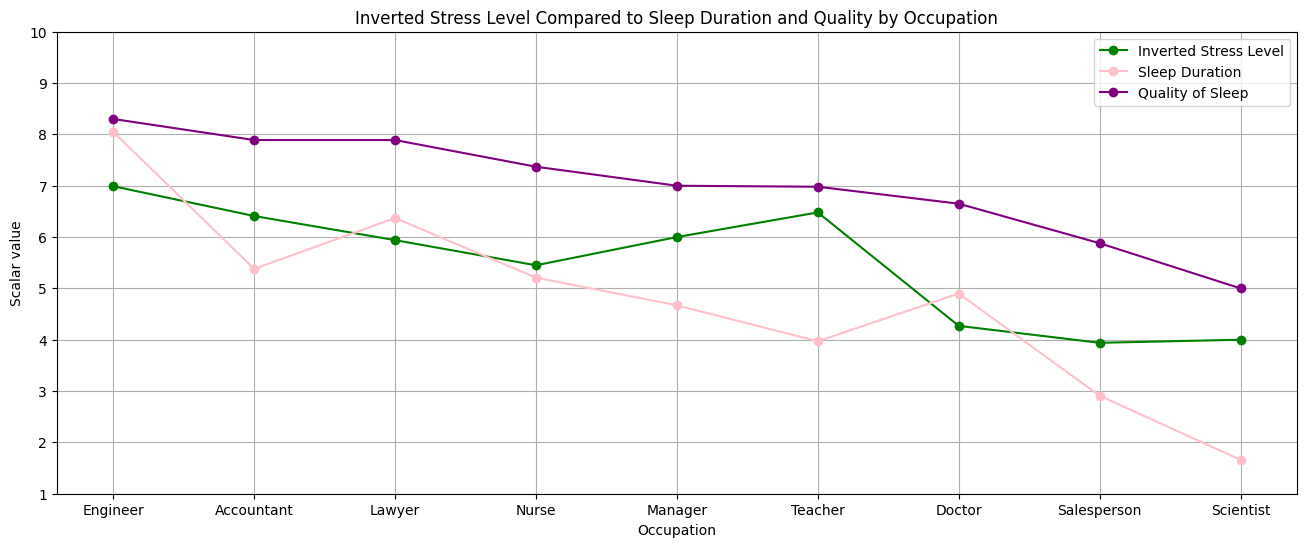

In [20]:
# Inverting Stress level

## I am using 11 because the max is 10 and if we were to subtract it from 10, then it would become 0 and the scale would be off.

df['Inverted Stress Level'] = 11 - df['Stress Level']

# Normalizing Values

## AI Acknowledgement: I did not know how to normalize values, so I asked ChatGPT to show me how to do it

scaler = MinMaxScaler(feature_range=(1, 10))

col_scale = ['Sleep Duration']

df_scaled = df.copy()

df_scaled[col_scale] = scaler.fit_transform(df_scaled[col_scale]).round(2)

df_scaled.head(10)

# Visualizing Stress Compared to Sleep

stress_viz = df_scaled.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep','Inverted Stress Level']].mean().round(2)

stress_viz = stress_viz.sort_values(by='Quality of Sleep', ascending=False)

plt.figure(figsize=(16, 6))
plt.plot(stress_viz.index, stress_viz['Inverted Stress Level'], marker = 'o', color = 'green', label='Inverted Stress Level')
plt.plot(stress_viz.index, stress_viz['Sleep Duration'], marker = 'o', color = 'pink', label='Sleep Duration')
plt.plot(stress_viz.index, stress_viz['Quality of Sleep'], marker = 'o', color = 'purple', label='Quality of Sleep')

plt.grid()
plt.ylim(1,10)

plt.title("Inverted Stress Level Compared to Sleep Duration and Quality by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Scalar value")
plt.legend()
plt.show()

This is pretty interesting because we can see that there are some people who have better stress values, but I would like to see the correlations between them.

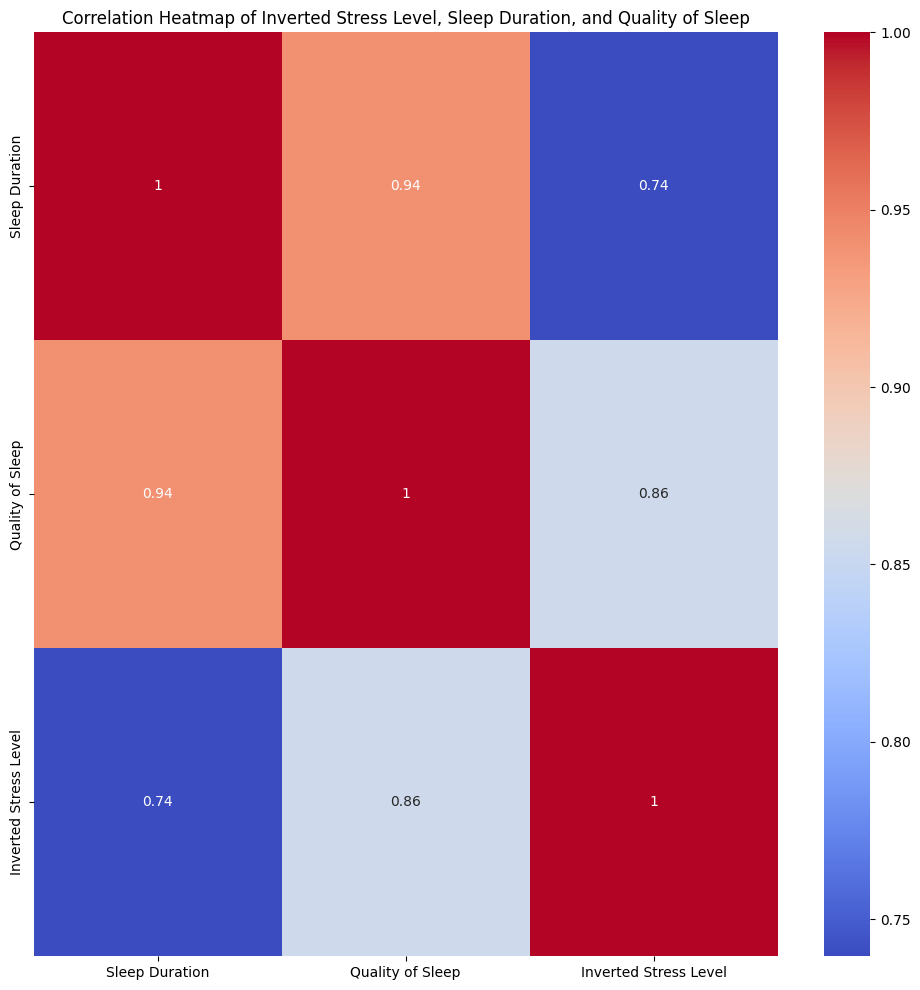

In [21]:
# Scaling for Correlation Testing

## AI Acknowledgement: I did not know how to normalize values, so I asked ChatGPT to show me how to do it

scaler = StandardScaler()
df_scaled[col_scale] = scaler.fit_transform(df_scaled[col_scale]).round(2)

df_scaled.head(10)

# Vizualizing Heat Map

## AI Acknowledgement: I did not know how to create a heat map, so I asked ChatGPT to show me how to do it

plt.figure(figsize=(12, 12))
correlation_matrix = stress_viz.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Inverted Stress Level, Sleep Duration, and Quality of Sleep")
plt.show()


It seems like the quality of sleep and the duration of sleep are strongly correlated, which is expected. It also looks like inverted stress and quality of sleep are strongly correlated as well! It seems like sleep duration and inverted stress are less strongly correlated, but there is still correlation there. <br><br>

### **Physical Health Analysis**

Next I would like to do investigate how the physical aspects relate to duration and quality of sleep. <br><br> I will be defining physical health aspects as:
- `Physical Activity Level`
- `BMI Category`
- `Daily Steps`
<br><br> To be able to compare `Physical Activity Level` and `Daily Steps`, I will need to scale them similar to how I did sleep duration.

In [22]:
# Create table for the Physical health attributes

physical_summary = df.groupby('Occupation')[['Physical Activity Level', 'Daily Steps']].mean().round(2)

physical_summary['#'] = df['Occupation'].value_counts()
physical_summary['% of Total'] = df['Occupation'].value_counts(normalize=True) * 100

# Add the most common BMI Category for each occupation

## AI Acknowledgement: I did not know how to find the most common BMI Category, so I asked ChatGPT

physical_summary['Most Common BMI Category'] = (
    df.groupby('Occupation')['BMI Category']
      .agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown')
)

physical_summary = physical_summary[['#', '% of Total',
                                     'Physical Activity Level',
                                     'Daily Steps',
                                     'Most Common BMI Category']].round(1)

physical_summary.head(11)

,#,% of Total,Physical Activity Level,Daily Steps,Most Common BMI Category
Occupation,,,,,
Accountant,37,9.9,58.1,6881.1,Normal
Doctor,71,19.0,55.4,6808.4,Normal
Engineer,67,17.9,51.6,5970.2,Normal
Lawyer,47,12.6,70.4,7661.7,Normal
Manager,1,0.3,55.0,5500.0,Overweight
Nurse,73,19.5,78.6,8057.5,Overweight
Salesperson,34,9.1,44.1,5823.5,Overweight
Scientist,4,1.1,41.0,5350.0,Overweight
Teacher,40,10.7,45.6,5957.5,Overweight


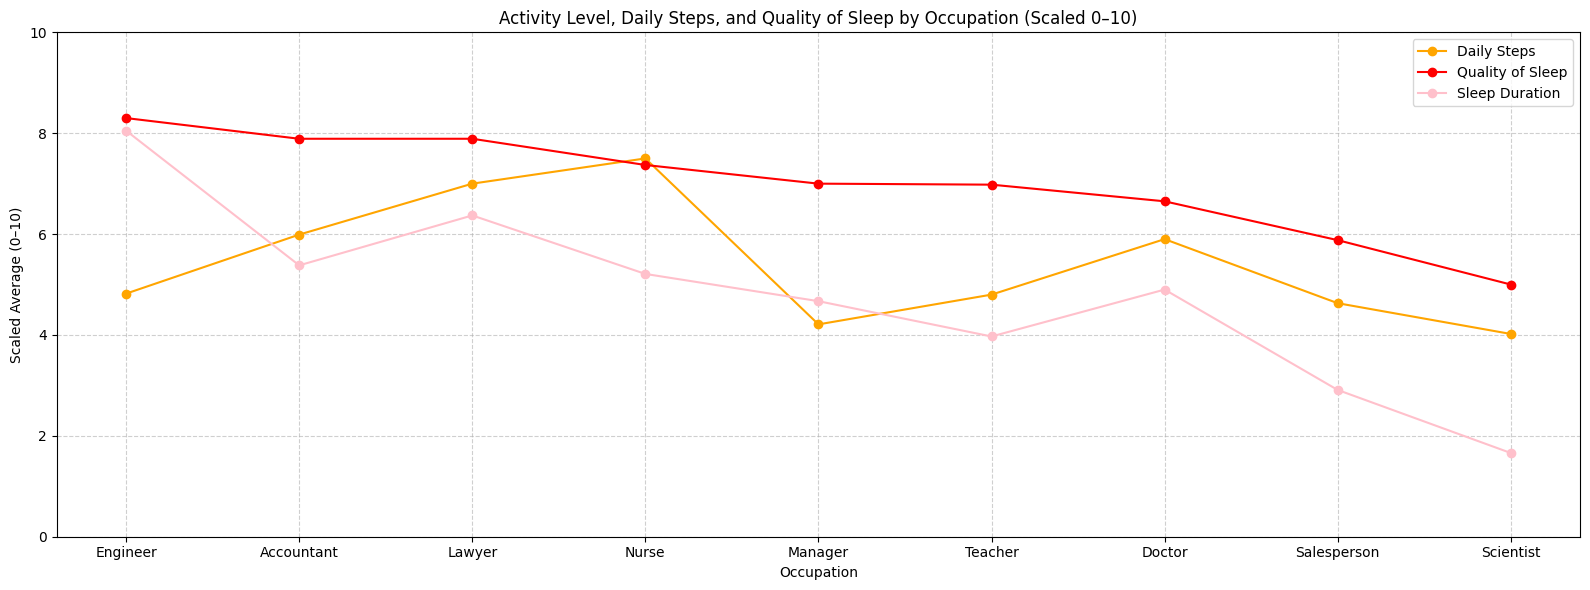

In [25]:
scaler = MinMaxScaler(feature_range=(1, 10))
df_scaled = df.copy()

# Scale only numeric columns of interest (1–10 range)
cols_to_scale = ['Physical Activity Level', 'Daily Steps', 'Sleep Duration']
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale]).round(2)

# Step 2: Group by Occupation and compute mean values
activity_viz = df_scaled.groupby('Occupation')[['Physical Activity Level', 'Daily Steps', 'Sleep Duration', 'Quality of Sleep']].mean().round(2)

activity_viz = activity_viz.sort_values(by='Quality of Sleep', ascending=False)

# Step 3: Plot results
plt.figure(figsize=(16, 6))

plt.plot(activity_viz.index,
         activity_viz['Daily Steps'],
         marker='o', color='orange', label='Daily Steps')

plt.plot(activity_viz.index,
         activity_viz['Quality of Sleep'],
         marker='o', color='red', label='Quality of Sleep')

plt.plot(stress_viz.index, stress_viz['Sleep Duration'], marker = 'o', color = 'pink', label='Sleep Duration')

# Step 4: Format the chart
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 10)
plt.title("Activity Level, Daily Steps, and Quality of Sleep by Occupation (Scaled 0–10)")
plt.xlabel("Occupation")
plt.ylabel("Scaled Average (0–10)")
plt.legend()
plt.tight_layout()
plt.show()


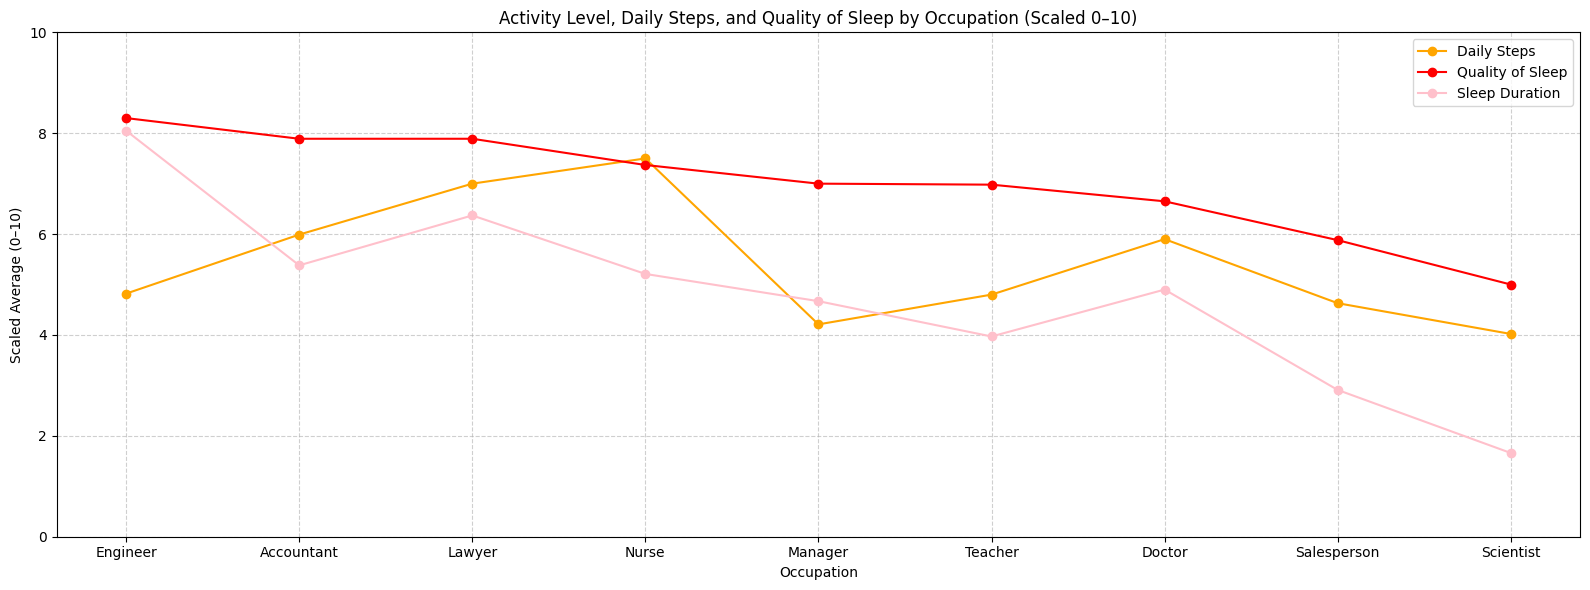

In [27]:
scaler = MinMaxScaler(feature_range=(1, 10))
df_scaled = df.copy()

# Scale only numeric columns of interest (1–10 range)
cols_to_scale = ['Physical Activity Level', 'Daily Steps', 'Sleep Duration']
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale]).round(2)

# Step 2: Group by Occupation and compute mean values
activity_viz = df_scaled.groupby('Occupation')[['Daily Steps', 'Sleep Duration', 'Quality of Sleep']].mean().round(2)

activity_viz = activity_viz.sort_values(by='Quality of Sleep', ascending=False)

# Step 3: Plot results
plt.figure(figsize=(16, 6))

plt.plot(activity_viz.index,
         activity_viz['Daily Steps'],
         marker='o', color='orange', label='Daily Steps')

plt.plot(activity_viz.index,
         activity_viz['Quality of Sleep'],
         marker='o', color='red', label='Quality of Sleep')
plt.plot(stress_viz.index, stress_viz['Sleep Duration'], marker = 'o', color = 'pink', label='Sleep Duration')

# Step 4: Format the chart
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 10)
plt.title("Activity Level, Daily Steps, and Quality of Sleep by Occupation (Scaled 0–10)")
plt.xlabel("Occupation")
plt.ylabel("Scaled Average (0–10)")
plt.legend()
plt.tight_layout()
plt.show()

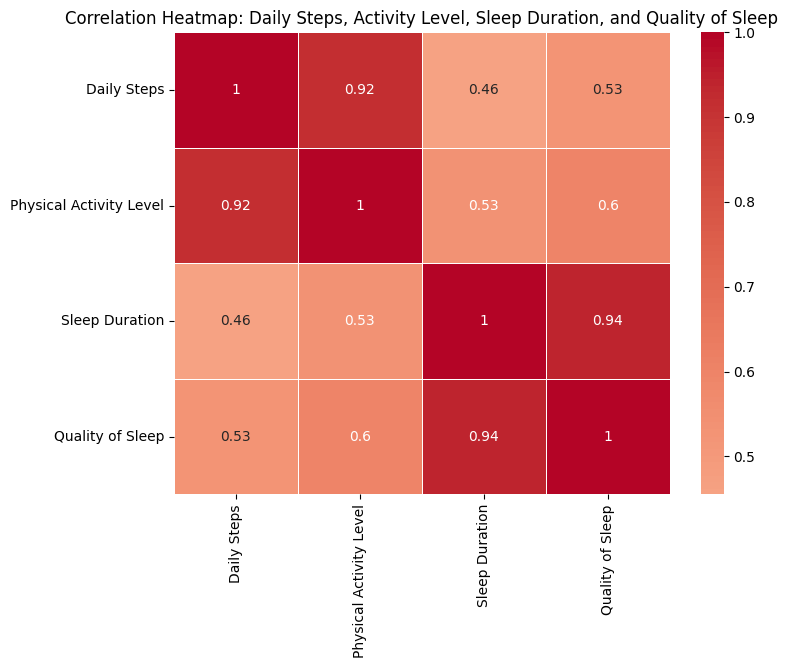

In [28]:
# Scaling for Correlation Testing

## AI Acknowledgement: I did not know how to normalize values, so I asked ChatGPT to show me how to do it.

from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_scaled = df.copy()
col_scale = ['Daily Steps', 'Physical Activity Level', 'Sleep Duration', 'Quality of Sleep']
scaler = StandardScaler()
df_scaled[col_scale] = scaler.fit_transform(df_scaled[col_scale]).round(2)

activity_viz = (
    df_scaled
    .groupby('Occupation')[['Daily Steps', 'Physical Activity Level', 'Sleep Duration', 'Quality of Sleep']]
    .mean()
    .round(2)
)

activity_viz = activity_viz.sort_values(by='Quality of Sleep', ascending=False)

# Visualizing Heat Map

## AI Acknowledgement: I did not know how to create a heat map, so I asked ChatGPT to show me how to do it.

plt.figure(figsize=(8, 6))
correlation_matrix = activity_viz.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)

plt.title("Correlation Heatmap: Daily Steps, Activity Level, Sleep Duration, and Quality of Sleep")
plt.show()


Obviously, there is a strong correlation between the `Physical Activity Level` and `Daily Steps` and `Sleep Duration` and `Quality of Sleep`. These are expected.

It looks like there is a moderate positive correlation between `Sleep Duration` and `Physical Activity Level`. Being more physically active is generally associated with being able to sleep longer. There is a slightly stronger correlation with `Sleep Quality` and Physical Activity level.

There is a weaker correlation between `Daily Steps` and `Sleep Duration`. `Daily Steps` still has a moderate correlation with `Sleep Quality` though.

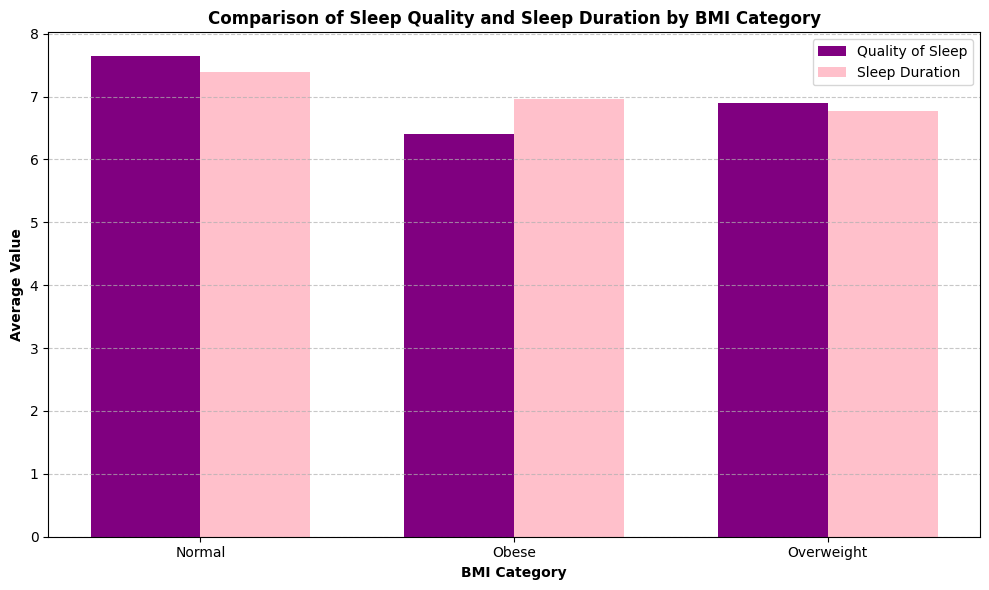

In [32]:
bmi_viz = (
    df.groupby('BMI Category')[['Quality of Sleep', 'Sleep Duration']]
      .mean()
      .round(2)
)

plt.figure(figsize=(10, 6))

bar_width = 0.35
x = range(len(bmi_viz))

plt.bar(
    [p - bar_width/2 for p in x],
    bmi_viz['Quality of Sleep'],
    width=bar_width,
    label='Quality of Sleep',
    color='purple'
)

plt.bar(
    [p + bar_width/2 for p in x],
    bmi_viz['Sleep Duration'],
    width=bar_width,
    label='Sleep Duration',
    color='pink'
)

plt.xticks(x, bmi_viz.index)
plt.title('Comparison of Sleep Quality and Sleep Duration by BMI Category', fontweight='bold')
plt.xlabel('BMI Category', fontweight='bold')
plt.ylabel('Average Value', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

I am curious to see how many of the applicants have sleep disorders by BMI, so I decided to investigate and visualize it.

In [41]:
# Count how many people in each BMI category have each type of sleep disorder
bmi_disorder_counts = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])
bmi_disorder_percent = pd.crosstab(df['BMI Category'], df['Sleep Disorder'], normalize='index') * 100
bmi_disorder_percent = bmi_disorder_percent.round(2)



print(bmi_disorder_counts)

print(bmi_disorder_percent)


Sleep Disorder  Insomnia  None  Sleep Apnea
BMI Category                               
Normal                 9   200            7
Obese                  4     0            6
Overweight            64    19           65
Sleep Disorder  Insomnia   None  Sleep Apnea
BMI Category                                
Normal              4.17  92.59         3.24
Obese              40.00   0.00        60.00
Overweight         43.24  12.84        43.92


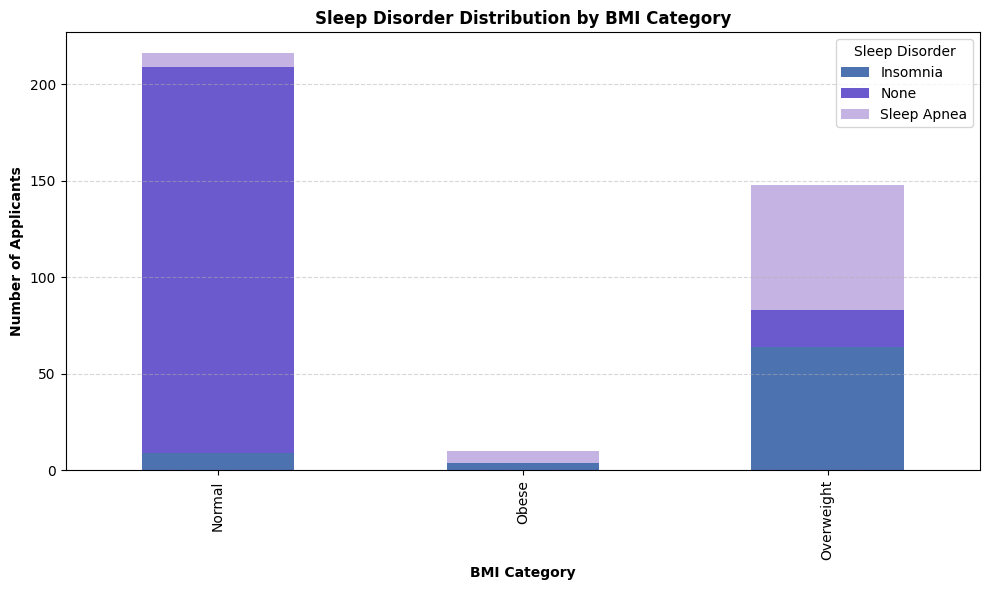

In [54]:
# Visualize it using a stacked bar chart

bmi_disorder_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color= sleep_palette[:3])
plt.title('Sleep Disorder Distribution by BMI Category', fontweight='bold')
plt.xlabel('BMI Category', fontweight='bold')
plt.ylabel('Number of Applicants', fontweight='bold')
plt.legend(title='Sleep Disorder')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ADD FINDINGS HERE LATER

In [24]:
df['Physical Activity Level'].max()

90

### NOTE FOR YOU LATER

- See how many applicants with BMI categories have sleep disorders


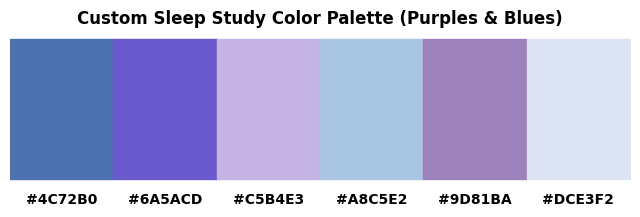

In [49]:
plt.figure(figsize=(8, 2))
for i, color in enumerate(sleep_palette):
    plt.fill_between([i, i + 1], 0, 1, color=color)
    plt.text(i + 0.5, -0.1, color, ha='center', va='top', fontsize=10, fontweight='bold')
plt.xlim(0, len(sleep_palette))
plt.axis('off')
plt.title("Custom Sleep Study Color Palette (Purples & Blues)", fontweight='bold')
plt.show()